# Load Datasets & Inspection

In [4]:
import polars as pl
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:
df = pl.read_csv("./data/train.csv").with_columns(pl.col("Cabin").str.split(by=" "))
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,list[str],str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"[""C85""]","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"[""C123""]","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [6]:
df.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,f64,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,204.0,"""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,687.0,"""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,null,"""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,null,"""S"""


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

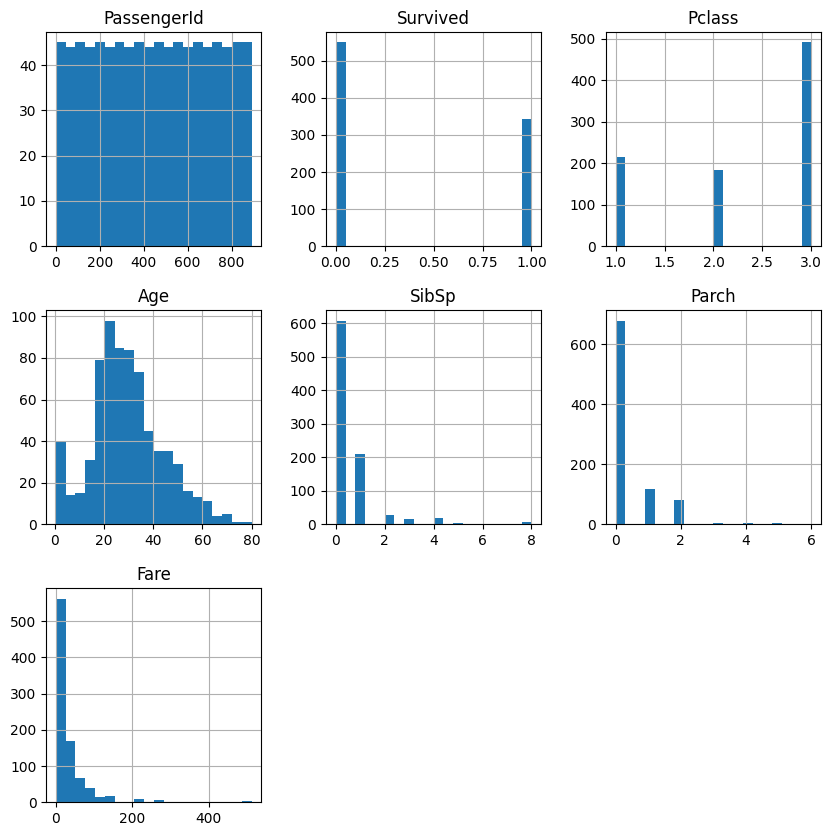

In [7]:
df.to_pandas().hist(grid=True, figsize=(10,10), bins=20)

# Transform Data

## Polars Transformation

In [8]:
side_col_expr: pl.Expr = (
	pl.when((pl.col("Deck") == "") | (pl.col("Number") == 0))
	.then(pl.lit("unknown"))
	.when(
		(pl.col("Deck") == "A") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(2, 40) | pl.col("Number").is_between(52, 98))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "A") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(1, 37) | pl.col("Number").is_between(51, 97))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "B") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(4, 42) | pl.col("Number").is_between(54, 92))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "B") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(3, 39) | pl.col("Number").is_between(53, 91))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "C") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(6, 44) | pl.col("Number").is_between(56, 96))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "C") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(5, 41) | pl.col("Number").is_between(55, 95))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "D") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(8, 46) | pl.col("Number").is_between(58, 98))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "D") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(7, 43) | pl.col("Number").is_between(57, 97))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "E") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(10, 48) | pl.col("Number").is_between(60, 100))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "E") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(9, 45) | pl.col("Number").is_between(59, 99))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "F") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(12, 50) | pl.col("Number").is_between(64, 104))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "F") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(11, 47) | pl.col("Number").is_between(63, 103))
	).then(pl.lit("starboard"))
	.when(
		(pl.col("Deck") == "G") & (pl.col("Number") % 2 == 0) &
		(pl.col("Number").is_between(14, 52) | pl.col("Number").is_between(66, 106))
	).then(pl.lit("port"))
	.when(
		(pl.col("Deck") == "G") & (pl.col("Number") % 2 != 0) &
		(pl.col("Number").is_between(13, 49) | pl.col("Number").is_between(65, 105))
	).then(pl.lit("starboard"))
	.when(pl.col("Number").is_null())
	.then(pl.lit("unknown"))
	.otherwise(pl.lit("middle"))
	.cast(pl.Categorical).alias("Side"),
)

In [9]:
section_col_expr: pl.Expr = (
	pl.when((pl.col("Deck") == "") | (pl.col("Number") == 0))
	.then(pl.lit("unknown"))
	.when(
		((pl.col("Deck").is_in(["A", "B", "C", "D"])) & (pl.col("Number") <= 27)) |
		((pl.col("Deck").is_in(["E", "F", "G"])) & (pl.col("Number") <= 30))
	).then(pl.lit("front"))
	.when(
		((pl.col("Deck").is_in(["A", "B", "C", "D"])) & (pl.col("Number").is_between(28, 50))) |
		((pl.col("Deck").is_in(["E", "F", "G"])) & (pl.col("Number").is_between(31, 55)))
	).then(pl.lit("mid-front"))
	.when(
		((pl.col("Deck").is_in(["A", "B", "C", "D"])) & (pl.col("Number").is_between(51, 80))) |
		((pl.col("Deck").is_in(["E", "F", "G"])) & (pl.col("Number").is_between(56, 85)))
	).then(pl.lit("middle"))
	.when(
		((pl.col("Deck").is_in(["A", "B", "C", "D"])) & (pl.col("Number").is_between(81, 110))) |
		((pl.col("Deck").is_in(["E", "F", "G"])) & (pl.col("Number").is_between(86, 115)))
	).then(pl.lit("mid-back"))
	.otherwise(pl.lit("back"))
	.cast(pl.Categorical)
	.alias("Sections"),
)

inner_outer_col_expr: pl.Expr = (
	pl.when((pl.col("Deck") == "") | (pl.col("Number") == 0))
	.then(pl.lit("unknown"))
	.when(
		(pl.col("Deck") == "A") & (pl.col("Number").is_between(201, 220)) |
		(pl.col("Deck") == "B") & (pl.col("Number").is_between(221, 250)) |
		(pl.col("Deck") == "C") & (pl.col("Number").is_between(301, 340)) |
		(pl.col("Deck") == "D") & (pl.col("Number").is_between(401, 430)) |
		(pl.col("Deck") == "E") & (pl.col("Number").is_between(501, 540)) |
		(pl.col("Deck") == "F") & (pl.col("Number").is_between(601, 640)) |
		(pl.col("Deck") == "G") & (pl.col("Number").is_between(701, 750))
	).then(pl.lit("inner"))
	.when(
		(pl.col("Number").is_between(1, 45)) |
		(pl.col("Number").is_between(51, 100)) |
		(pl.col("Number").is_between(150, 200))
	).then(pl.lit("outer"))
	.otherwise(pl.lit("unknown"))
	.cast(pl.Categorical)
	.alias("CabinType")
)


In [13]:
def drop_cols(df: pl.DataFrame) -> pl.DataFrame:
	return df.drop(["PassengerId", "Name", "Ticket", "Fare"])

def split_cabin_col_in_categories(df: pl.DataFrame) -> pl.DataFrame:
	return (
		df.with_columns(
			# Split the Cabin column and get the first element
			pl.col("Cabin").fill_null("").str.split(by=" ")
			.map_elements(lambda s: s[0] if not s.is_empty() else "", return_dtype=pl.String)
			.alias("FirstCabin")
		).with_columns(
			# Split into deck and number
			pl.col("FirstCabin").str.slice(0, 1).alias("Deck"),
			pl.col("FirstCabin").str.slice(1)
			.map_elements(lambda s: int(s) if s else 0, return_dtype=pl.Int16)
			.alias("Number")
		).drop(
			["Cabin", "FirstCabin"]
		).with_columns(side_col_expr)
		.with_columns(section_col_expr)
		.with_columns(inner_outer_col_expr)
		.with_columns(
			pl.col("Deck").map_elements(lambda s: "unknown" if not s else s, return_dtype=pl.String)
		)
		.drop(["Number"])
	)

def age_col_to_categories(df: pl.DataFrame) -> pl.DataFrame:
	return (
		df.with_columns(
			pl.when(pl.col("Age").is_null() | pl.col("Age").is_nan())
			.then(pl.lit("unknown"))
			.when(pl.col("Age") <= 12)
			.then(pl.lit("child"))
			.when(pl.col("Age") <= 18)
			.then(pl.lit("teenager"))
			.when(pl.col("Age") <= 25)
			.then(pl.lit("young_adult"))
			.when(pl.col("Age") <= 50)
			.then(pl.lit("adult"))
			.when(pl.col("Age") <= 70)
			.then(pl.lit("old"))
			.otherwise(pl.lit("very_old"))
			.cast(pl.Categorical).alias("AgeCat")
		).drop(["Age"])
	)

def recast_cols(df: pl.DataFrame) -> pl.DataFrame:
	return (
		df.with_columns(
			pl.col("Pclass").cast(pl.String).cast(pl.Categorical),
			pl.col("Sex").cast(pl.Categorical),
			pl.col("Embarked").cast(pl.Categorical),
			pl.col("Deck").cast(pl.Categorical),
		)
	)



In [15]:
df = pl.read_csv("./data/train.csv")
df = drop_cols(df)
df = split_cabin_col_in_categories(df)
df = age_col_to_categories(df)
df = recast_cols(df)
df.head()

Survived,Pclass,Sex,SibSp,Parch,Embarked,Deck,Side,Sections,CabinType,AgeCat
i64,cat,cat,i64,i64,cat,cat,cat,cat,cat,cat
0,"""3""","""male""",1,0,"""S""","""unknown""","""unknown""","""unknown""","""unknown""","""young_adult"""
1,"""1""","""female""",1,0,"""C""","""C""","""starboard""","""mid-back""","""outer""","""adult"""
1,"""3""","""female""",0,0,"""S""","""unknown""","""unknown""","""unknown""","""unknown""","""adult"""
1,"""1""","""female""",1,0,"""S""","""C""","""middle""","""back""","""unknown""","""adult"""
0,"""3""","""male""",0,0,"""S""","""unknown""","""unknown""","""unknown""","""unknown""","""adult"""


## Sklearn Transformations

In [16]:
num_pipeline = Pipeline([
	("scaler", StandardScaler(with_mean=True))
])

cat_pipeline = Pipeline([
	("one_hot_encoder", OneHotEncoder(sparse_output=False)),
	("scaler", StandardScaler(with_mean=True))
])

In [17]:
num_cols = ["SibSp", "Parch"]
cat_cols = ["Pclass", "Sex", "Embarked", "Deck", "Side", "Sections", "CabinType", "AgeCat"]

col_transf = ColumnTransformer(
	[
		("num_pipeline", num_pipeline, num_cols),
		("cat_pipeline", cat_pipeline, cat_cols)
	],
	remainder="passthrough"
)

In [18]:
from sklearn.model_selection import train_test_split

data = col_transf.fit_transform(df)

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

# Models

## Logistic Regression

In [19]:
import sys
sys.path.append("/Users/leon/Desktop/kaggle/titanic")

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7982062780269058

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
scores, scores.mean()

(array([0.76865672, 0.81343284, 0.80597015, 0.7518797 , 0.82706767]),
 0.7934014139827179)

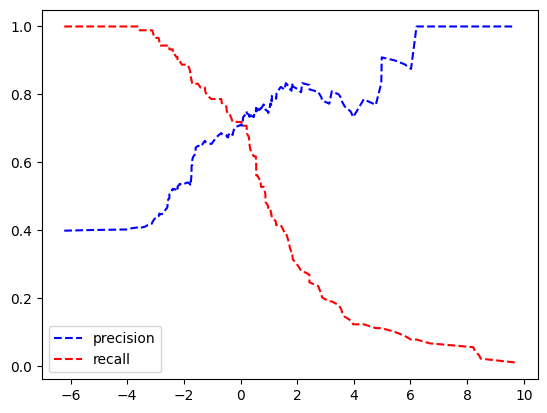

/Users/leon/Desktop/kaggle/titanic/src/plotting.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


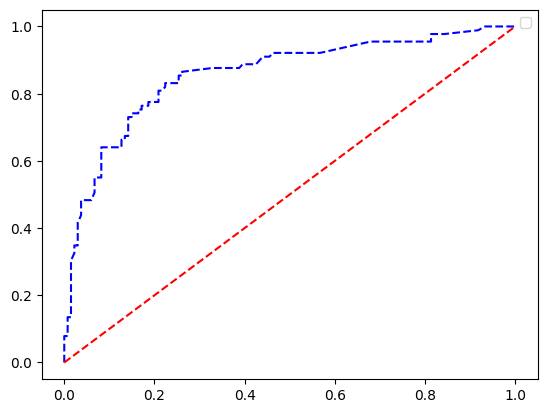

In [35]:
from src.plotting import MetricPlots as mp
mp.gen_and_plot_precision_and_recall(log_reg, X_test, y_test)
y_scores = log_reg.decision_function(X_test)
mp.gen_and_plot_roc_curve(y_test, y_scores)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

0.8571608250880429

## SGDClassifier

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.726457399103139

In [26]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
scores = cross_val_score(sgd_clf, X_train, y_train, cv=5)
scores, scores.mean()

(array([0.70895522, 0.79850746, 0.73880597, 0.70676692, 0.79699248]),
 0.7500056110425317)

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7982062780269058

In [28]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
scores, scores.mean()

(array([0.79850746, 0.82089552, 0.79104478, 0.81203008, 0.87969925]),
 0.8204354169004601)

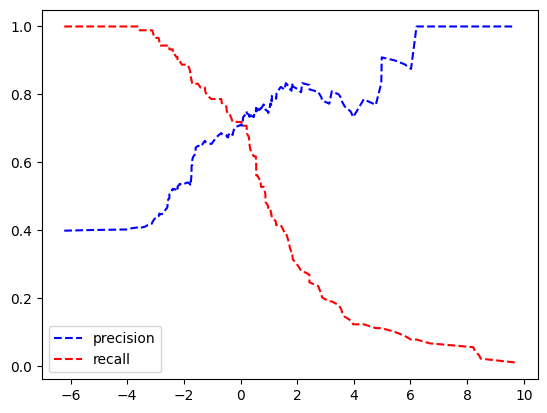

/Users/leon/Desktop/kaggle/titanic/src/plotting.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


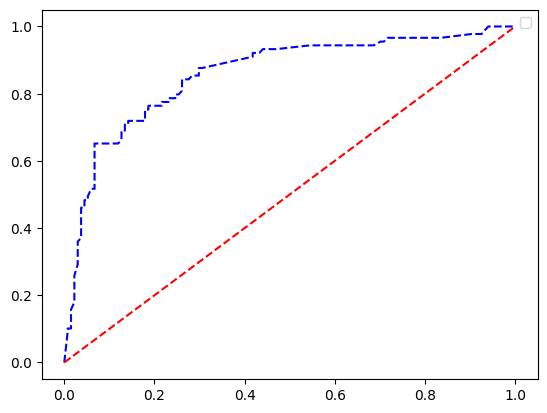

In [31]:
mp.gen_and_plot_precision_and_recall(log_reg, X_test, y_test)
y_scores = rf_clf.predict_proba(X_test)[:, 1]
mp.gen_and_plot_roc_curve(y_test, y_scores)

In [ ]:
roc_auc_score(y_test, y_scores)

0.857663927553245